## Goal of this Notebook

1. Simulate random walks, and think of them as betting on a coin flip. We can add more paramaters later like cost of walk or slippage, which would be analagous to commissions and fees. 
2. Look at the utility in using the kelly criterion to decide an amount to bet vs. picking a fixed amount. The [kelly bet](https://en.wikipedia.org/wiki/Kelly_criterion) is calculated on a 1:1 payoff. We can also enhance the functionality of the kelly bet to account for different payoffs and losses with different probabilities. This can be done in a future notebook
3. Simulate a walk using the two day and three day movement probabilities derived in previous notebooks, and see if it looks something like the actual stock movements.

In [1]:
from stock_utils import *
import random

In [2]:
def run_random_walks(starting_value, stride_length, p, n_steps, n_trials):
    """
    Run 1D random walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      stride_length  -- Size of our steps in either direction
      p              -- Probability of success
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there

    Returns the trial_results, which contains the results of each random walk
    """
    trial_results = []

    for i in range(n_trials):
        values = []
        value = starting_value
        for j in range(n_steps):
            values.append(value)
            if (value <= 0):
                value = 0
            elif (random.random() < p):
                value += stride_length
            else:
                value -= stride_length
        trial_results.append(values)

    return trial_results

def run_random_walks_kelly(starting_value, p, n_steps, n_trials, kelly_fraction=1):
    """
    Run 1D random walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      stride_length  -- Size of our steps in either direction
      p              -- Probability of success
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      kelly_fraction -- Multiply the kelly bet by this to be safer. Should be between 0 and 1
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    """
    trial_results = []

    for i in range(n_trials):
        values = []
        value = starting_value
        for j in range(n_steps):
            values.append(value)
            stride_length = int((2 * p - 1) * value * kelly_fraction) ## Kelly
            if (value <= 0):
                value = 0
            elif (random.random() < p):
                value += stride_length
            else:
                value -= stride_length
        trial_results.append(values)

    return trial_results

def run_gaussian_random_walks(starting_value, mu, sigma, n_steps, n_trials):
    """
    Run 1D random gaussian walks with the following parameters:
      starting_value -- Value on the number line at which to start the random walk
      mu             -- Average percent value of stride length
      sigma          -- Average percent standard deviation
      n_trials       -- Number of trials to run
      n_steps        -- Number of steps to take on our random walk
      
    NOTE: 0 will be an absorbing state. Meaning that if we hit 0 we're stuck there
    
    Returns the trial_results, which contains the results of each random walk
    We are assuming no "edge" to tilt things in our favor
    """
    trial_results = []

    for i in range(n_trials):
        step_multipliers = np.random.normal(mu, sigma, n_steps) / 100
        values = []
        value = starting_value
        for j in range(n_steps):
            values.append(value)
            if (value <= 0):
                value = 0
            value = value + step_multipliers[j] * value
        trial_results.append(values)

    step_multipliers
    return trial_results

In [3]:
starting_value = 1000
stride_length = 10 ## If success, add stride_length. If failure, subtract stride_length
p = 1/2            ## Chance of success
n_trials = 75      ## Number of random walks starting at the base value
n_steps = 100      ## Number of steps to take on our random walk

trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

Plot results of the random walk

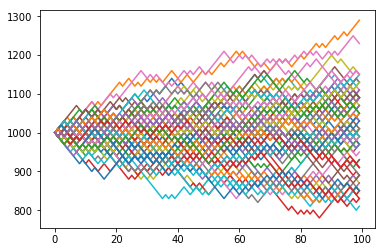

In [4]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### Let's see what happens if we gain a 3% edge

In [5]:
p = 0.53
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

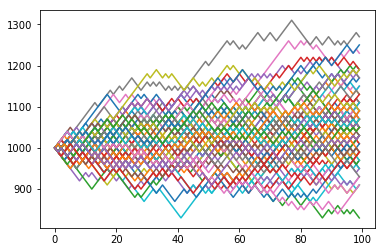

In [6]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### Let's bet bigger!

In [7]:
stride_length = 50
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

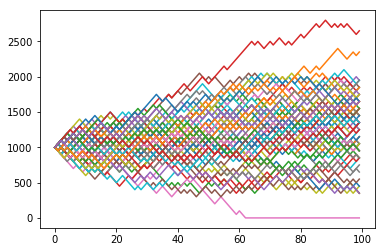

In [8]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

### 5% edge

In [9]:
p = 0.55
stride_length = 10
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)

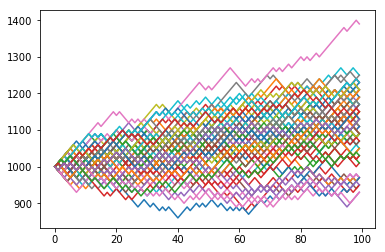

In [10]:
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

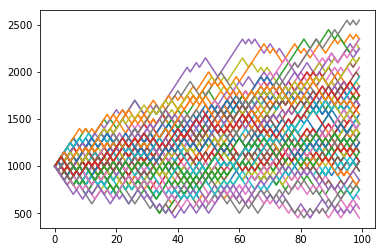

In [11]:
stride_length = 50
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

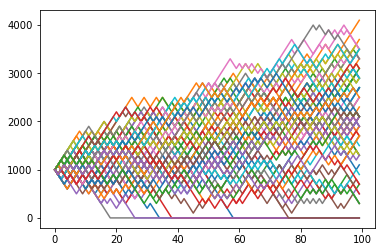

In [12]:
stride_length = 100
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
plt.show()

## Now let's try a dynamic random walk where the stride_length is determined by the Kelly Criterion
We will compare it to doing a fixed bet

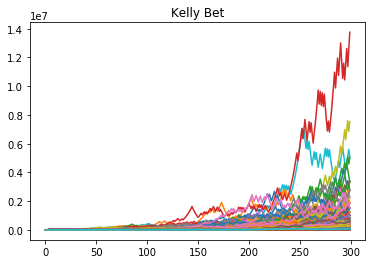

Mean of final values is 197662.135
Median of final values is 49893.0


In [13]:
n_trials = 1000
starting_value = 10000
p = 0.55
n_steps = 300
trial_results = run_random_walks_kelly(starting_value, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.title('Kelly Bet')
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

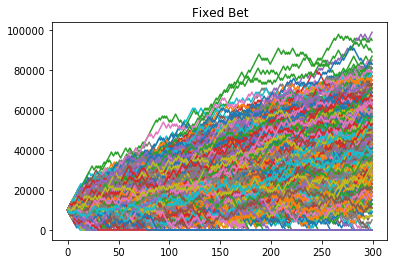

Mean of final values is 37272.0
Median of final values is 39000.0


In [14]:
n_trials = 1000
starting_value = 10000
stride_length = 1000
p = 0.55
n_steps = 300
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.title('Fixed Bet')
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

#### The kelly bet seems to really shine when it comes to both "keeping you in the game", and maximizing your potential winnings. 
Your chance of ending up at 0 are reduced, and you can leverage the size of your pot for more potential gains. The longer you play, the more this will be evident. For example, if you crank up n_steps by a factor of 3, the differences in result are staggering.

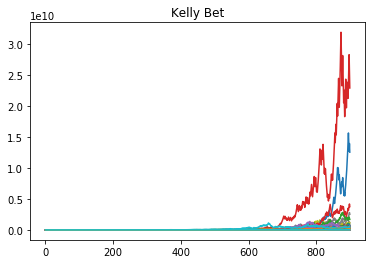

Mean of final values is 65578681.997
Median of final values is 1007473.5


In [15]:
n_steps = 900
trial_results = run_random_walks_kelly(starting_value, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.title('Kelly Bet')
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

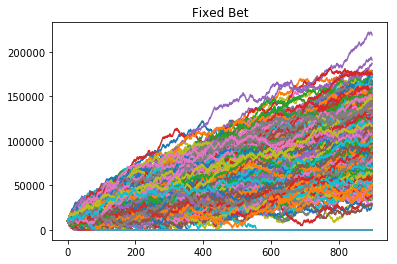

Mean of final values is 88981.0
Median of final values is 97000.0


In [16]:
trial_results = run_random_walks(starting_value, stride_length, p, n_steps, n_trials)
final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.title('Fixed Bet')
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

## Gaussian Random Walk

In [17]:
df = pd.DataFrame()
df = df.from_csv('stock_data/spy.csv')
daily_movements = get_price_movements(df)

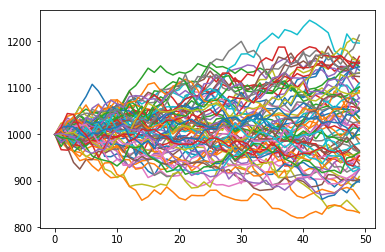

Mean of final values is 1026.34216233
Median of final values is 1023.5810924


In [18]:
starting_value = 1000
mu, sigma = np.mean(daily_movements), np.std(daily_movements)
n_steps = 50
n_trials = 75
trial_results = run_gaussian_random_walks(starting_value, mu, sigma, n_steps, n_trials)

final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

# Let's compare the accuracy of a Gaussian random walk vs. a random walk informed by momentum information
We will use all but the last 50 days as info to learn the mean and standard deviation of price movements to use for Gaussian random walks. (We can always try shorter periods as well). We will also use this same data to train our momentum models. 

We can eventually use this same methodolgy to backtest more sophisticated models such as random forests or neural networks.

Notes:

Test - Use daily movement distribution to generate a random walk for 30 days, then do the same with the momentum distribution, and look at the results. (Use the last 30 days of a few stocks as test data, omit them from training). (How would we interpret different random walks though? Take the mean at each time step or something?)
 - Compare using both a 2 day and 3 day momentum model
 - Can use an overall momentum model from all stocks, stock specific, or a mixture
 - Can also use a mixture model of two day and three day momentum OR use these as features for a boosting algorithm
 
 Develop a few actionable strategies from the notebooks I have so far (and the above test).

In [19]:
df = pd.DataFrame()
df = df.from_csv('stock_data/spy.csv')
daily_movements = get_price_movements(df)

### 1) Test Gaussian random walk

### For now, use the mean of each trial as the guess

In [20]:
def simulate_movements(movements, starting_value):
    simulation = []
    value = starting_value
    for i in range(len(movements)):
        simulation.append(value)
        value += value * movements[i] * 0.01
    return simulation

In [21]:
prediction_period = 25
prior_daily_movements = daily_movements[0:-prediction_period]
prior_movement_categories = categorize_movements(prior_daily_movements)

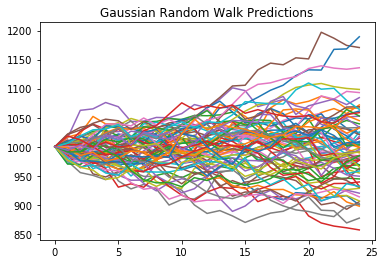

Mean of final values is 997.101908431
Median of final values is 995.426230971


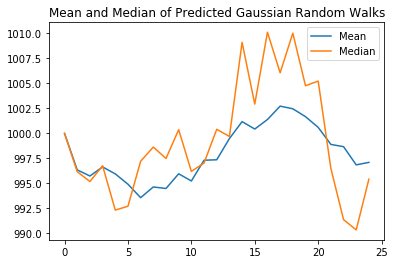

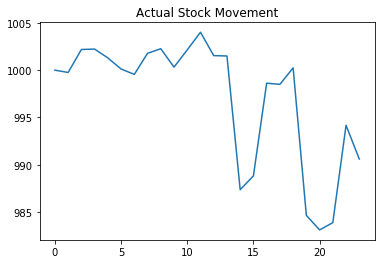

In [22]:
starting_value = 1000
mu, sigma = np.mean(prior_daily_movements), np.std(prior_daily_movements)
n_steps = prediction_period
n_trials = 75

trial_results = run_gaussian_random_walks(starting_value, mu, sigma, n_steps, n_trials)

final_values = []
plt.figure()
for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])

plt.title('Gaussian Random Walk Predictions')
plt.show()
print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

mean_values = []
median_values = []
for i in range(n_steps):
    total = 0
    values = []
    for j in range(n_trials):
        total += trial_results[j][i]
        values.append(trial_results[j][i])
    mean_values.append(total / n_trials)
    median_values.append(np.median(values))
        
plt.figure()
plt.title('Mean and Median of Predicted Gaussian Random Walks')
plt.plot(mean_values, label='Mean')
plt.plot(median_values, label='Median')
plt.legend()
plt.figure()
plt.title('Actual Stock Movement')
plt.plot(simulate_movements(daily_movements[-prediction_period:-1], starting_value))
plt.show()

### 2) Test Momentum models

### Two Day Momentum
First step is random, second step is generated by the two day momentum model

In [23]:
def categorize_movement(movement, mu, sigma, n_cats=4):
    if not (n_cats == 4):
        raise ValueError('Only 4 categories supported at this time')

    if (movement <= (mu - sigma)):
        category = 'bd'  ## big drop
    elif (movement <= mu):
        category = 'sd'  ## small drop
    elif (movement >= (mu + sigma)):
        category = 'bg'  ## big gain
    elif (movement >= mu):
        category = 'sg'  ## small gain

    return category

In [24]:
def choose_category(labels, probabilities):
    num = np.random.rand(1)[0]
    for i in range(len(probabilities)):
        num = num - probabilities[i]
        if num <= 0:
            return labels[i]
        
    ## Probabilities didn't sum perfectly to one
    return np.random.choice(labels, 1)[0]
    

In [25]:
def generate_next_two_day_step(previous_step, two_day_probs, mu, sigma):
    conditional_probabilities = {'bd':two_day_probs[0:4], 
                                 'sd':two_day_probs[4:8],
                                 'sg':two_day_probs[8:12],
                                 'bg':two_day_probs[12:16]}
    conditional_probability = conditional_probabilities[categorize_movement(previous_step, mu, sigma)]
    
    choice = choose_category(['bd', 'sd', 'sg', 'bg'], conditional_probability)
    
    random_samples = np.random.normal(mu, sigma, 1000)
    
    ## Draw on random samples until we get a result of the correct category
    for i in range(len(random_samples)):
        if (categorize_movement(random_samples[i], mu, sigma) == choice):
            #print(choice)
            #print(random_samples[i])
            return random_samples[i]
        
    ## Very unlikely to happen, but will catch in the case none of the samples have the category we're looking for
    return 0

In [26]:
def get_probabilities(two_day_trends, categories, n_categories=4):
    two_day_probs = []
    if (n_categories == 4):
        all_categories = ['bd', 'sd', 'sg', 'bg']
    else:
        raise ValueError('Only four categories are supported at this time')
        
    for first_day in all_categories:
        first_day_count = count_movement_category(categories, first_day)
        for next_day in all_categories:
            two_day_name = first_day +'_' + next_day
            two_day_count = count_trends(two_day_trends, two_day_name)
            two_day_prob = two_day_count / first_day_count
            two_day_probs.append(two_day_prob)

    return two_day_probs

In [27]:
def run_two_day_momentum_simulation(prior_daily_movements, starting_value, mu, sigma, n_steps, n_trials):
    ## Get categories and trends
    prior_movement_categories = categorize_movements(prior_daily_movements, n_cats=4)
    prior_two_day_trends = get_trends(prior_movement_categories, 2)
    two_day_probs = get_probabilities(prior_two_day_trends, prior_movement_categories)
    
    trials = []
    for i in range(n_trials):
        first_step = generate_next_two_day_step(prior_daily_movements[-1], two_day_probs, mu, sigma)
        #print(first_step)
        steps = [first_step]

        for i in range(n_steps - 1):
            steps.append(generate_next_two_day_step(steps[i], two_day_probs, mu, sigma))
        
        trials.append(simulate_movements(steps, starting_value))

    return trials

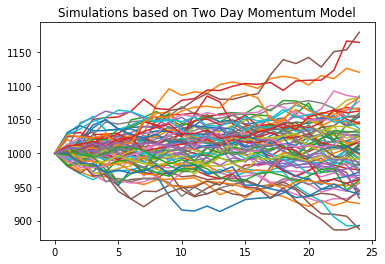

Mean of final values is 1008.40322623
Median of final values is 1011.24877198


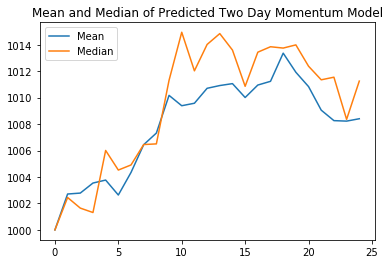

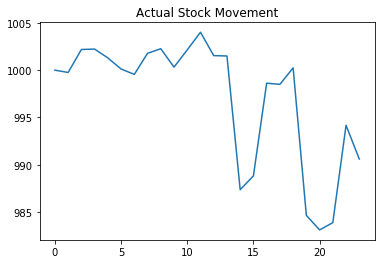

In [28]:
trial_results = run_two_day_momentum_simulation(prior_daily_movements, starting_value, mu, sigma, n_steps, n_trials)
final_values = []

for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.title('Simulations based on Two Day Momentum Model')
plt.show()

print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

mean_values = []
median_values = []
for i in range(n_steps):
    total = 0
    values = []
    for j in range(n_trials):
        total += trial_results[j][i]
        values.append(trial_results[j][i])
    mean_values.append(total / n_trials)
    median_values.append(np.median(values))

plt.figure()
plt.title('Mean and Median of Predicted Two Day Momentum Model')
plt.plot(mean_values, label='Mean')
plt.plot(median_values, label='Median')
plt.legend()
plt.figure()
plt.title('Actual Stock Movement')
plt.plot(simulate_movements(daily_movements[-prediction_period:-1], starting_value))
plt.show()

### Three Day Momentum
First step is random, second step is generated by the two day momentum model, third step and onward is generated by the three day momentum model

In [29]:
def get_three_day_probabilities(three_day_trends, two_day_name, categories, n_categories=4):
    """Returns the probability distribution for the third day given the previous two"""
    two_day_probs = []
    if (n_categories == 4):
        all_categories = ['bd', 'sd', 'sg', 'bg']
    else:
        raise ValueError('Only four categories are supported at this time')
        
    three_day_counts = []
    total = 0
    for next_day in all_categories:
        three_day_name = two_day_name + '_' + next_day
        three_day_count = count_trends(three_day_trends, three_day_name)
        total += three_day_count
        three_day_counts.append(three_day_count)

    three_day_probs = []
    [three_day_probs.append(three_day_counts[i] / total) for i in range(len(three_day_counts))]
    return three_day_probs

In [30]:
## Just a test
three_day_trends = get_trends(prior_movement_categories, 3)
two_day_name = 'sd_sd'
get_three_day_probabilities(three_day_trends, two_day_name, prior_movement_categories)

[0.09971509971509972,
 0.358974358974359,
 0.46438746438746437,
 0.07692307692307693]

In [31]:
def generate_next_three_day_step(step_before_last, previous_step, three_day_probability, mu, sigma):
    two_day_name = categorize_movement(step_before_last, mu, sigma) + '_' + categorize_movement(previous_step, mu, sigma)
    choice = choose_category(['bd', 'sd', 'sg', 'bg'], three_day_probability)
    random_samples = np.random.normal(mu, sigma, 1000)
    
    ## Draw on random samples until we get a result of the correct category
    for i in range(len(random_samples)):
        if (categorize_movement(random_samples[i], mu, sigma) == choice):
            return random_samples[i]
        
    ## Very unlikely to happen, but will catch in the case none of the samples have the category we're looking for
    return 0

In [32]:
def run_three_day_momentum_simulation(prior_daily_movements, starting_value, mu, sigma, n_steps, n_trials):
    ## Get categories and trends
    prior_movement_categories = categorize_movements(prior_daily_movements, n_cats=4)
    prior_three_day_trends = get_trends(prior_movement_categories, 3)
    
    trials = []
    
    ## Collect a dictionay of three day probabilities
    all_categories = ['bd', 'sd', 'sg', 'bg']
    three_day_probs = {}
    for first_day in all_categories:
        for next_day in all_categories:
            two_day_name = first_day + '_' + next_day
            three_day_probs[two_day_name] = get_three_day_probabilities(prior_three_day_trends, two_day_name, prior_movement_categories)
    
    ## Generate steps based on the movements of the prior two days
    for i in range(n_trials):
        two_day_name = categorize_movement(prior_daily_movements[-2], mu, sigma) + '_' + categorize_movement(prior_daily_movements[-1], mu, sigma)
        three_day_prob = three_day_probs[two_day_name]
        first_step = generate_next_three_day_step(prior_daily_movements[-2], prior_daily_movements[-1], three_day_prob, mu, sigma)
        
        two_day_name = categorize_movement(prior_daily_movements[-2], mu, sigma) + '_' + categorize_movement(prior_daily_movements[-1], mu, sigma)
        three_day_prob = three_day_probs[two_day_name]
        second_step = generate_next_three_day_step(prior_daily_movements[-1], first_step, three_day_prob, mu, sigma)
        
        steps = [first_step, second_step]

        for i in range(n_steps - 2):
            two_day_name = categorize_movement(steps[i], mu, sigma) + '_' + categorize_movement(steps[i+1], mu, sigma)
            three_day_prob = three_day_probs[two_day_name]
            steps.append(generate_next_three_day_step(steps[i], steps[i+1], three_day_prob, mu, sigma))
        
        trials.append(simulate_movements(steps, starting_value))

    return trials

Simulation:

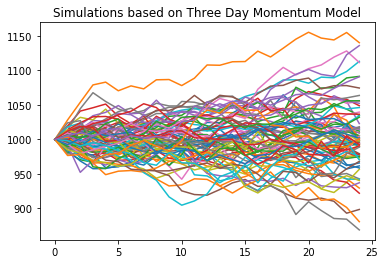

Mean of final values is 1002.30682314
Median of final values is 997.908605751


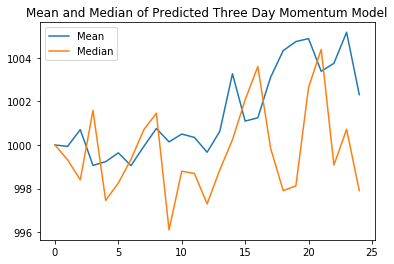

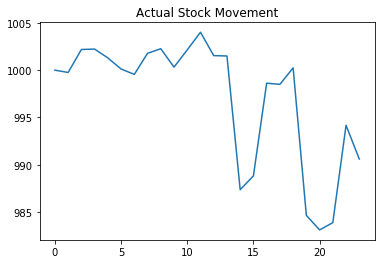

In [33]:
trial_results = run_three_day_momentum_simulation(prior_daily_movements, starting_value, mu, sigma, n_steps, n_trials)
final_values = []

for i in range(len(trial_results)):
    plt.plot(trial_results[i])
    final_values.append(trial_results[i][n_steps-1])
plt.title('Simulations based on Three Day Momentum Model')
plt.show()

print("Mean of final values is " + str(np.mean(final_values)))
print("Median of final values is " + str(np.median(final_values)))

mean_values = []
median_values = []
for i in range(n_steps):
    total = 0
    values = []
    for j in range(n_trials):
        total += trial_results[j][i]
        values.append(trial_results[j][i])
    mean_values.append(total / n_trials)
    median_values.append(np.median(values))

plt.figure()
plt.title('Mean and Median of Predicted Three Day Momentum Model')
plt.plot(mean_values, label='Mean')
plt.plot(median_values, label='Median')
plt.legend()
plt.figure()
plt.title('Actual Stock Movement')
plt.plot(simulate_movements(daily_movements[-prediction_period:-1], starting_value))
plt.show()